In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cooltools
import cooler
import warnings
warnings.filterwarnings('ignore')

In [5]:
def get_scaling_and_derivative(clr):
    resolution = 5000
    cvd_smooth_agg = cooltools.expected_cis(clr = clr, smooth = True, aggregate_smoothed = True, smooth_sigma = 0.1, nproc = 24)
    cvd_smooth_agg['dist_bp'] = cvd_smooth_agg['dist']*resolution
    cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['dist_bp', 'balanced.avg.smoothed.agg']]
    der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']), np.log(cvd_merged['dist_bp']))
    cvd_merged['balanced.avg.smoothed.agg.der'] = der
    return(cvd_merged)

### Hi-C in HAP1 with TetO integrations:
* TACL-ON - TetR fused to MAU2, extruding on DNA
* TACL-OFF - TetR fused to MAU2, doxycycline treatment to stop loop extrusion
* Cherry - TetR fused to mCherry

## Genome-wide scaling

In [6]:
tacl_on = cooler.Cooler('./coolers/T-MAU2.hg38.mapq_30.1000.mcool::resolutions/5000')
tacl_off = cooler.Cooler('./coolers/T-MAU2_Dox_1H.hg38.mapq_30.1000.mcool::resolutions/5000')
cherry = cooler.Cooler('./coolers/T-mCherry.hg38.mapq_30.1000.mcool::resolutions/5000')
haarhuis_hap1 = cooler.Cooler('./coolers/haarhuis_2017.WT.hg38.mapq_30.1000.mcool::resolutions/5000')
sanborn_hap1 = cooler.Cooler('./coolers/sanborn_2015.WT.hg38.mapq_30.1000.mcool::resolutions/5000')

scaling_and_derivative_tacl_on = get_scaling_and_derivative(tacl_on)
scaling_and_derivative_tacl_off = get_scaling_and_derivative(tacl_off)
scaling_and_derivative_cherry = get_scaling_and_derivative(cherry)
scaling_and_derivative_haarhuis_hap1 = get_scaling_and_derivative(haarhuis_hap1)
scaling_and_derivative_sanborn_hap1 = get_scaling_and_derivative(sanborn_hap1)

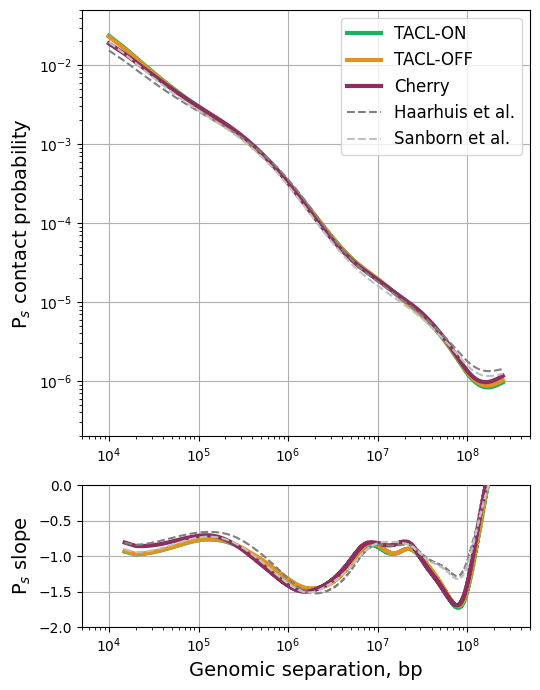

In [12]:
plt.figure(figsize = (5.5, 7))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.plot(scaling_and_derivative_tacl_on['dist_bp'][2:], scaling_and_derivative_tacl_on['balanced.avg.smoothed.agg'][2:], zorder = 3, label = 'TACL-ON', color = '#1DB062', lw = 3)
plt.plot(scaling_and_derivative_tacl_off['dist_bp'][2:], scaling_and_derivative_tacl_off['balanced.avg.smoothed.agg'][2:], zorder = 3, label = 'TACL-OFF', color = '#DF941F', lw = 3)
plt.plot(scaling_and_derivative_cherry['dist_bp'][2:], scaling_and_derivative_cherry['balanced.avg.smoothed.agg'][2:], zorder = 3, label = 'Cherry', color = '#8B2F60', lw = 3)
plt.plot(scaling_and_derivative_haarhuis_hap1['dist_bp'][2:], scaling_and_derivative_haarhuis_hap1['balanced.avg.smoothed.agg'][2:], zorder = 3, label = 'Haarhuis et al.', color = 'grey', ls = '--')
plt.plot(scaling_and_derivative_sanborn_hap1['dist_bp'][2:], scaling_and_derivative_sanborn_hap1['balanced.avg.smoothed.agg'][2:], zorder = 3, label = 'Sanborn et al.', color = 'silver', ls = '--')
plt.ylabel('P$_s$ contact probability', fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.grid(zorder = 0)
plt.xlim((5000, 500000000))
plt.ylim((2e-7, 5e-2))
plt.legend(loc = 'upper right', fontsize = 12)

plt.subplot(spec[1])
plt.plot(scaling_and_derivative_tacl_on['dist_bp'][3:], scaling_and_derivative_tacl_on['balanced.avg.smoothed.agg.der'][3:], zorder = 3, color = '#1DB062', lw = 3)
plt.plot(scaling_and_derivative_tacl_off['dist_bp'][3:], scaling_and_derivative_tacl_off['balanced.avg.smoothed.agg.der'][3:], zorder = 3, color = '#DF941F', lw = 3)
plt.plot(scaling_and_derivative_cherry['dist_bp'][3:], scaling_and_derivative_cherry['balanced.avg.smoothed.agg.der'][3:], zorder = 3, color = '#8B2F60', lw = 3)
plt.plot(scaling_and_derivative_haarhuis_hap1['dist_bp'][3:], scaling_and_derivative_haarhuis_hap1['balanced.avg.smoothed.agg.der'][3:], zorder = 3, color = 'grey', ls = '--')
plt.plot(scaling_and_derivative_sanborn_hap1['dist_bp'][3:], scaling_and_derivative_sanborn_hap1['balanced.avg.smoothed.agg.der'][3:], zorder = 3, color = 'silver', ls = '--')
plt.ylabel('P$_s$ slope', fontsize = 14)
plt.xlabel('Genomic separation, bp', fontsize = 14)
plt.xscale('log')
plt.grid(zorder = 0)
plt.xlim((5000, 500000000))
plt.ylim((-2, 0))

plt.tight_layout()
plt.savefig('/DATA/users/magnitov/tacl/figures/scalings_tacl.pdf', bbox_inches = 'tight')
plt.show()